In [2]:
import h2o
import h2o.grid
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.20.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.20.04, mixed mode, sharing)
  Starting server from /home/gerd/Documents/Python/venvs/h2o/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1ph7p9l3
  JVM stdout: /tmp/tmp1ph7p9l3/h2o_gerd_started_from_python.out
  JVM stderr: /tmp/tmp1ph7p9l3/h2o_gerd_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Vienna
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,1 month and 20 days
H2O_cluster_name:,H2O_from_python_gerd_nqugoh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.867 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [8]:
data = h2o.import_file('http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip')
train, valid, test = data.split_frame([0.8, 0.1], seed=69)

allColumns = data.columns
allColumns.remove("ArrDelay")
allColumns.remove("TailNum")
allColumns.remove("IsArrDelayed")
allColumns.remove("ActualElapsedTime")
allColumns.remove("ArrTime")

targetColumn = "ArrDelay"

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [10]:
dl_regression = H2ODeepLearningEstimator(variable_importances=True)
dl_regression.train(x=allColumns, y=targetColumn, validation_frame=valid, training_frame=test)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [11]:
dl_regression.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 82.56392570657621
RMSE: 9.086469375207084
MAE: 5.7672912402359735
RMSLE: NaN
Mean Residual Deviance: 82.56392570657621


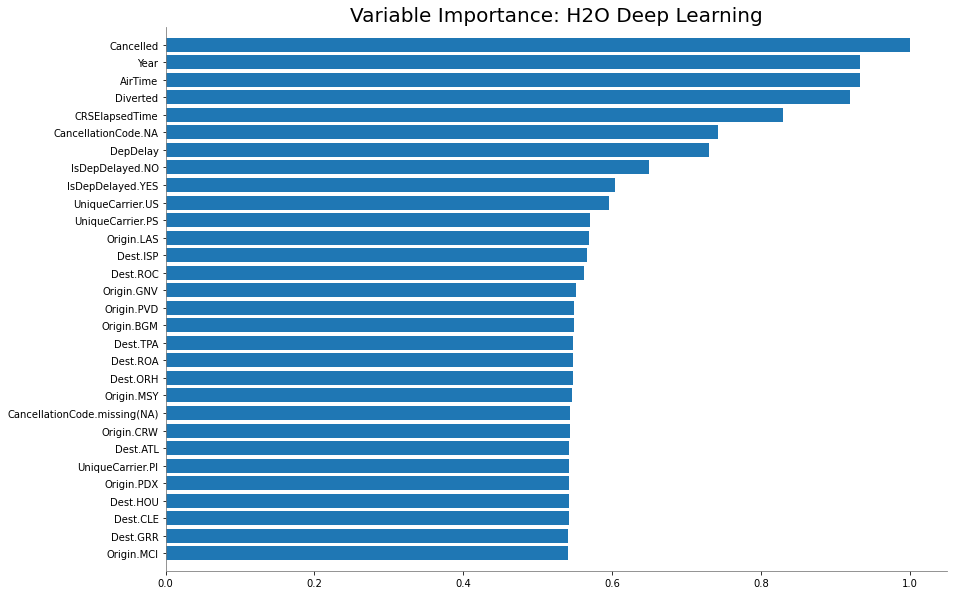

In [12]:
dl_regression.varimp_plot(30)

In [14]:
#
# more epochs model
#
dl_regression_200_epochs = H2ODeepLearningEstimator(variable_importances=True, epochs=200, stopping_rounds=5, stopping_tolerance=0.0, 
                                                   stopping_metric="deviance")

dl_regression_200_epochs.train(x=allColumns, y=targetColumn, training_frame=train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [ ]:
h2o